In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.4.1'

### Image Classification using Tesnorflow's Pre-trained model

We are going to classify different images (downloading from the internet) using tensorflow's pre-trained model (**ResNet50**)

In [3]:
# import libraries 

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import resnet50

In [4]:
# Initialize the model

model = resnet50.ResNet50()

In [5]:
# extracting jpg images from the directory

%ls *.jpg

 Volume in drive C is Windows
 Volume Serial Number is EEBF-2F4D

 Directory of C:\Waqas Documents\Waqas\W.A\Programming\Data Sciecnce\With Python\Projects\2. Image Classification - Pre Trained Model

01/27/2021  09:37 AM             8,149 car.jpg
01/27/2021  09:38 AM             8,076 cat.jpg
01/27/2021  09:40 AM             5,864 images.jpg
01/27/2021  09:39 AM             7,938 shirt.jpg
               4 File(s)         30,027 bytes
               0 Dir(s)  199,402,479,616 bytes free


In [6]:
images = ["car.jpg","cat.jpg","images.jpg","shirt.jpg"]

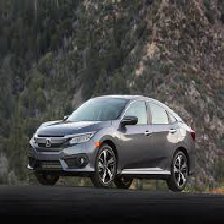

In [7]:
# display image
car = image.load_img("car.jpg", target_size= (224,224))
car

In [8]:
# convert image to array

car_array = image.img_to_array(car)
print(car_array.shape)
print(car_array[:2])

(224, 224, 3)
[[[61. 64. 57.]
  [62. 65. 58.]
  [65. 68. 61.]
  ...
  [56. 50. 50.]
  [54. 54. 44.]
  [59. 59. 49.]]

 [[61. 64. 57.]
  [62. 65. 58.]
  [65. 68. 61.]
  ...
  [34. 28. 28.]
  [63. 62. 57.]
  [68. 67. 62.]]]


In [9]:
# Reshape image into 4 dimension (1,width, height, colors)

car_reshape = car_array.reshape((1,224,224,3))
print(car_reshape.shape)
print(car_reshape[0])

(1, 224, 224, 3)
[[[61. 64. 57.]
  [62. 65. 58.]
  [65. 68. 61.]
  ...
  [56. 50. 50.]
  [54. 54. 44.]
  [59. 59. 49.]]

 [[61. 64. 57.]
  [62. 65. 58.]
  [65. 68. 61.]
  ...
  [34. 28. 28.]
  [63. 62. 57.]
  [68. 67. 62.]]

 [[60. 63. 56.]
  [61. 64. 57.]
  [64. 67. 60.]
  ...
  [53. 47. 47.]
  [66. 64. 65.]
  [69. 67. 68.]]

 ...

 [[ 7.  7.  7.]
  [ 7.  7.  7.]
  [ 7.  7.  7.]
  ...
  [12. 10. 11.]
  [11. 11. 11.]
  [11. 11. 11.]]

 [[ 7.  7.  7.]
  [ 7.  7.  7.]
  [ 7.  7.  7.]
  ...
  [10.  8.  9.]
  [ 9.  9.  9.]
  [ 9.  9.  9.]]

 [[ 7.  7.  7.]
  [ 7.  7.  7.]
  [ 7.  7.  7.]
  ...
  [ 9.  7.  8.]
  [ 7.  7.  7.]
  [ 7.  7.  7.]]]


In [10]:
# preprocess the image for prediction. This step is optional

processed_img = resnet50.preprocess_input(car_reshape)
print(processed_img.shape)
processed_img

(1, 224, 224, 3)


array([[[[ -46.939003,  -52.779   ,  -62.68    ],
         [ -45.939003,  -51.779   ,  -61.68    ],
         [ -42.939003,  -48.779   ,  -58.68    ],
         ...,
         [ -53.939003,  -66.779   ,  -67.68    ],
         [ -59.939003,  -62.779   ,  -69.68    ],
         [ -54.939003,  -57.779   ,  -64.68    ]],

        [[ -46.939003,  -52.779   ,  -62.68    ],
         [ -45.939003,  -51.779   ,  -61.68    ],
         [ -42.939003,  -48.779   ,  -58.68    ],
         ...,
         [ -75.939   ,  -88.779   ,  -89.68    ],
         [ -46.939003,  -54.779   ,  -60.68    ],
         [ -41.939003,  -49.779   ,  -55.68    ]],

        [[ -47.939003,  -53.779   ,  -63.68    ],
         [ -46.939003,  -52.779   ,  -62.68    ],
         [ -43.939003,  -49.779   ,  -59.68    ],
         ...,
         [ -56.939003,  -69.779   ,  -70.68    ],
         [ -38.939003,  -52.779   ,  -57.68    ],
         [ -35.939003,  -49.779   ,  -54.68    ]],

        ...,

        [[ -96.939   , -109.779   , -1

In [12]:
prediction = model.predict(processed_img)
prediction.shape

(1, 1000)

In [13]:
# Decode the prediction

classification = resnet50.decode_predictions(prediction)
classification

40960/35363 [==================================] - 0s 1us/step


[[('n03770679', 'minivan', 0.31969708),
  ('n02974003', 'car_wheel', 0.11672901),
  ('n09193705', 'alp', 0.085564144),
  ('n03930630', 'pickup', 0.04815318),
  ('n04461696', 'tow_truck', 0.04539699)]]

In [18]:
classification[0][0][1]

'minivan'

In [21]:
# classifying all the images using above procedure

for img in images:
    load_img = image.load_img(img, target_size= (224,224))
    img_array = image.img_to_array(load_img)
    reshape_array = img_array.reshape((1,224,224,3))
    processed = resnet50.preprocess_input(reshape_array)
    prediction = model.predict(processed)
    classification = resnet50.decode_predictions(prediction)
    print("This is the "+ classification[0][0][1])

This is the minivan
This is the tiger_cat
This is the bulletproof_vest
This is the Loafer


In [23]:
# Removing processed_input method

for img in images:
    load_img = image.load_img(img, target_size= (224,224))
    img_array = image.img_to_array(load_img)
    reshape_array = img_array.reshape((1,224,224,3))
    # processed = resnet50.preprocess_input(reshape_array)
    prediction = model.predict(reshape_array)
    classification = resnet50.decode_predictions(prediction)
    print("This is the "+ classification[0][0][1])

This is the convertible
This is the lynx
This is the wool
This is the Loafer
